# MTA Subway Hourly Ridership: 2020-2024

**Imports**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

**Loading data**

In [36]:
# Importing dataset
url = 'https://data.ny.gov/resource/wujg-7c2s.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

         transit_timestamp transit_mode  station_complex_id  \
0  2022-09-11T00:00:00.000       subway                 198   
1  2022-09-11T05:00:00.000       subway                 134   
2  2022-09-11T10:00:00.000       subway                 438   
3  2022-09-11T06:00:00.000       subway                 271   
4  2022-09-11T14:00:00.000       subway                 426   

                station_complex    borough payment_method  \
0  Howard Beach-JFK Airport (A)     Queens      metrocard   
1                 Sutter Av (L)   Brooklyn      metrocard   
2                  135 St (2,3)  Manhattan      metrocard   
3             Steinway St (M,R)     Queens      metrocard   
4                E 180 St (2,5)      Bronx      metrocard   

                fare_class_category  ridership  transfers   latitude  \
0       Metrocard - Unlimited 7-Day       10.0        0.0  40.660477   
1  Metrocard - Seniors & Disability        2.0        0.0  40.669370   
2       Metrocard - Unlimited 7-Day   

### Creating plots

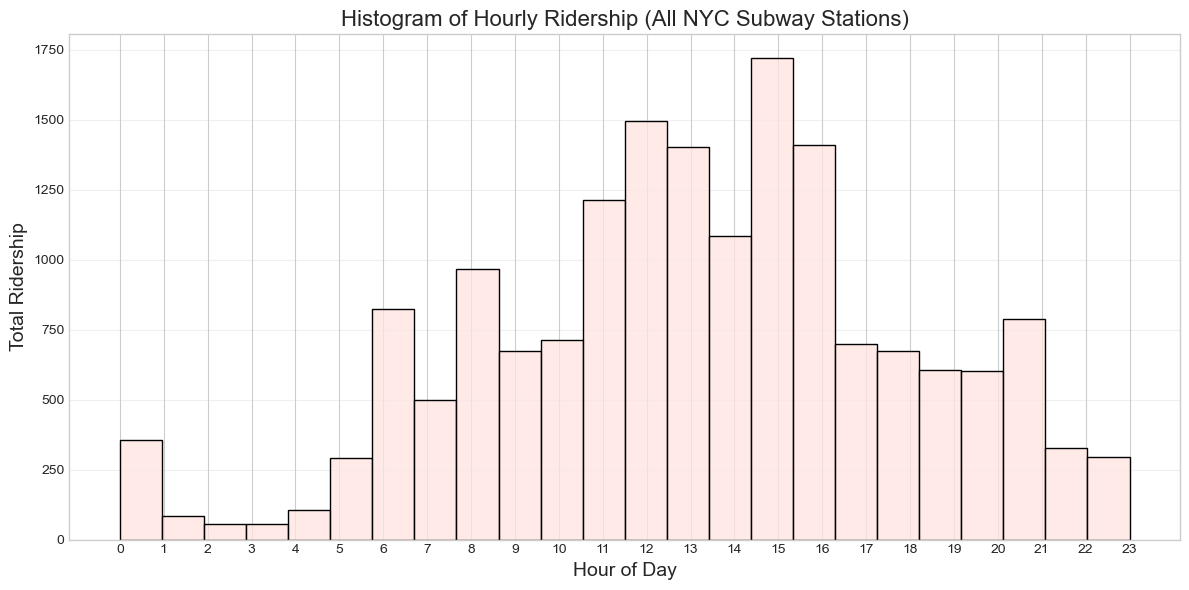

In [41]:
# Convert timestamp to datetime and extract hour
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df = df.dropna(subset=['transit_timestamp', 'ridership'])  # drop rows with missing timestamps or ridership
df['hour'] = df['transit_timestamp'].dt.hour

# Plot histogram of hourly ridership
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df, 
    x='hour', 
    weights='ridership',  # weight each entry by its ridership count
    bins=24, 
    kde=False, 
    color='mistyrose',
    edgecolor='black'
)

plt.title('Histogram of Hourly Ridership (All NYC Subway Stations)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
